<div style='background-color: lightblue'>
<a id='TableOfContents'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 30px;''>
        Table of Contents
    </h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href='#wrangle'>Wrangle</a></li>
<li><a href='#explore'>Exploration</a></li>
<li><a href='#model'>Modeling</a></li>
<li><a href='#conclusion'>Conclusion</a></li>

<div style='background-color : lightblue'>
<a id='imports'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Imports
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

In [1]:
import acquire as a
import prepare as p
import functions as f

<div style='background-color : lightblue'>
<a id='wrangle'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Wrangle
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<h3><b>Acquire</b></h3>

- Data acquired from web-scraping 30 pages of README.md files from popular github repositories on 15 May 2023. The end result is a dataset containing 270 README content blocks, 90 for each of the 3 most popular programming languages.

**Filters**: Most Starred

**Languages**: Java, Javascript, Python

In [2]:
df = a.get_dataFrame()
df.shape

(270, 3)

In [3]:
df.language.value_counts()

JavaScript    90
Python        90
Java          90
Name: language, dtype: int64

---

<h3><b>Prepare</b></h3>

- Data Parsing

    - Convert text to all lower case for normalcy.
    - Remove any accented characters, non-ASCII characters.
    - Remove special characters.
    - Stem or lemmatize the words.
    - Remove stopwords.
    - Store the clean text and the original text for use in future notebooks.    
  
  
- Remove "giveaways"
    - Remove 'python', 'py', 'java', 'javascript', 'js', 'script'
        - Removed because these words showed to be dead giveaways of the language we are predicting.
          
          
- Calculate README word counts
    - Define word counts for analysis, exploration, and determining a proper statistical test.  

In [4]:
# From the 'prepare.py' file...
# Get the prepared dataframe
df = p.basic_clean_df(df)
df.head()

,language,readme_contents,readme_length
0,javascript,svginjector fast caching dynamic inline svg do...,4214
1,javascript,reactpackreactpackpng npm versionnpmimagenpmur...,3058
2,javascript,see demo check helium action httpsfundrisecom ...,6588
3,javascript,sequence npm versionnpmimagenpmurl build statu...,2943
4,javascript,socialfeed jquery plugin show r feed popular s...,5104


- Prepared data shape:
    - Rows: 270
    - Columns: 3 (programming language, README content, README length)

---

<div style='background-color : lightblue'>
<a id='explore'></a>
    <b><u><i><h1 style='text-align : center;padding-top: 25px;''>
        Exploration
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>

<h3><b>Split</b></h3>

- Train
    - 56%
- Validate
    - 24%
- Test
    - 20%
    
**Stratified on Programming Language**

In [5]:
# From the 'functions.py' file...
# Split the data into train, validate, test subsets
train, val, test = p.train_val_test(df, stratify=True, target='language')
train.shape, val.shape, test.shape

((151, 3), (65, 3), (54, 3))

<h3><b>Kruskal-Wallis Test</b></h3>


- The Kruskal-Wallis test is a non-parametric statistical test used to determine if there are significant differences between three or more independent groups. 

- It is used when the data violate the assumptions of parametric tests (e.g., normality and equal variances) and provides a way to compare the medians of the groups instead of the means. 

- By using rank-based analysis, it allows for the comparison of data that are not normally distributed and helps identify if there are significant differences among the groups being compared.

<b>Question 1:</b> 

<b>H$_0$:</b> There is no significant difference in word counts among the three groups.

<b>H$_a$:</b> There is a significant difference in word counts among the three groups.

<b>&alpha;</b> = **0.5**

In [6]:
# From the 'functions.py' file...
# Get the Kruskal-Wallis Test comparing README word counts among the 3 groups
f.get_kruskal_wallis_test(train)

Kruskal-Wallis Test
Test statistic: 1.588211304682887
P-value: 0.4519852861969167


<b>Q1 Answer:</b> 

**Because our p-value is greater than our alpha, we fail to reject the null hypothesis, and cannot state with confidence that there is a significant difference in README word count amoung the the groups.**

<a id='visuals'></a>
<h3><b>Key Visuals</b></h3>
<li><a href='#explore'>Exploration Top</a></li>

<div class="tableauPlaceholder" id="viz1684339124714" style="position: relative">
    <noscript>
        <a href="#"><img alt="Top 5 Most Frequently Occurring Readme Words" src="https://public.tableau.com/static/images/Wo/Wordcount_16843388132380/Sheet1/1_rss.png" style="border: none" /></a>
    </noscript>
    <object class="tableauViz" style="display:none;">
        <param name="host_url" value="https://public.tableau.com/" />
        <param name="embed_code_version" value="3" />
        <param name="site_root" value="" />
        <param name="name" value="Wordcount_16843388132380/Sheet1" />
        <param name="tabs" value="no" />
        <param name="toolbar" value="yes" />
        <param name="static_image" value="https://public.tableau.com/static/images/Wo/Wordcount_16843388132380/Sheet1/1.png" />
        <param name="animate_transition" value="yes" />
        <param name="display_static_image" value="yes" />
        <param name="display_spinner" value="yes" />
        <param name="display_overlay" value="yes" />
        <param name="display_count" value="yes" />
        <param name="language" value="en-US" />
    </object>
</div>
<script type="text/javascript">
    var divElement = document.getElementById('viz1684339124714');
    var vizElement = divElement.getElementsByTagName('object')[0];
    vizElement.style.width = '100%';
    vizElement.style.height = (divElement.offsetWidth * 0.75) + 'px';
    var scriptElement = document.createElement('script');
    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';
    vizElement.parentNode.insertBefore(scriptElement, vizElement);
</script>

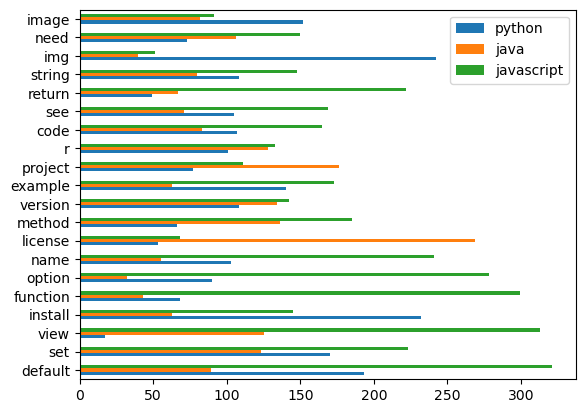

In [7]:
# From the 'functions.py' file...
# Call function to define word lists and frequencies of README word for each language
python_freq, java_freq, java_script_freq, all_freq, all_words, python_words, java_words, java_script_words = f.get_word_freqs(df)
# Call function to display a visualization of the top 20 words for each language 
f.top_twenty_words_vis(python_freq, java_freq, java_script_freq, all_freq)

**Summary**

Here we see our top 20 most commonly used words for all 3 languages. We can notice some words that may be good indicators of the programming language used by exploring this visualization. 

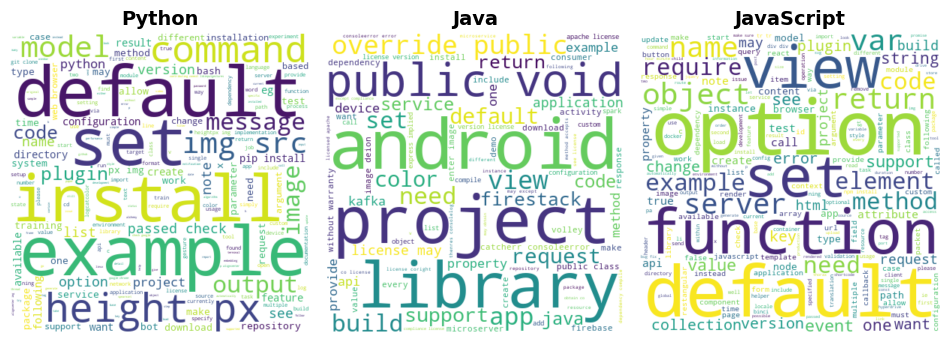

In [8]:
# From the 'functions.py' file...
# Call funtion to display wordgram for each language
f.get_wordgrams(python_words, java_words, java_script_words)

**Summary**

Here we see our wordgram that identifies common words for each language at a glance.

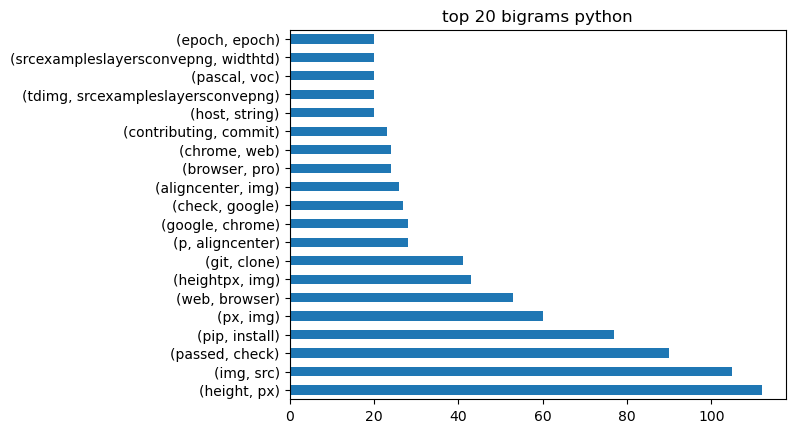

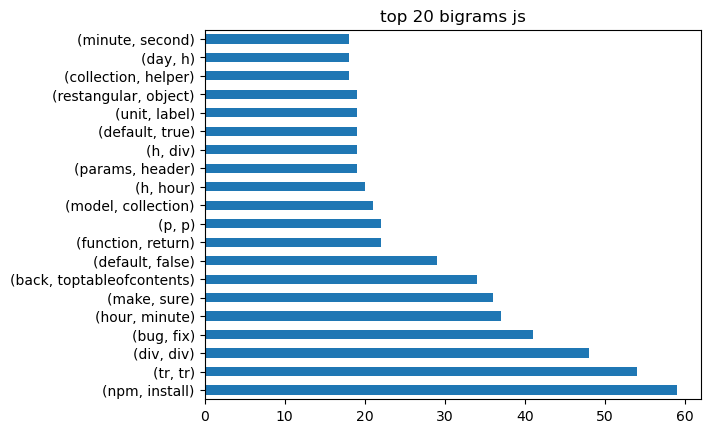

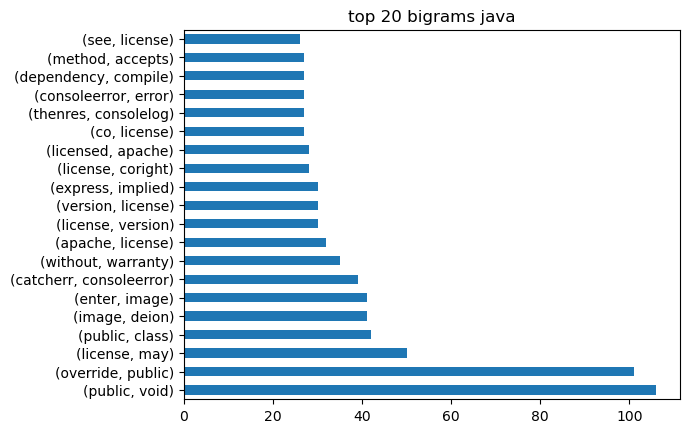

In [9]:
# From the 'functions.py' file...
# call funtion to display top 20 bigrams for each language
f.top_twenty_bigrams(java_words, python_words, java_script_words)

**Summary**

Here we see that there are some good indicators of programming language evident by reviewing bigrams.

<a id='exploresummary'></a>
<h3><b>Exploration Summary</b></h3>

Overall, the exploration shows us what may be good indicators of a repositories programming language by observing the top frequently used words, as well as word clouds. For instance: with bigrams, if  "height, px" is observed, there is a high chance of it being a python repository. Similarly, time measurments are shown here to be very evident in javascript repositories, and terminoligy synonymous with licencing and copyright show to be common in java repositories.  

<li><a href='#explore'>Exploration Top</a></li>

---

<div style='background-color: cyan'>
<a id='model'></a>
    <b><u><i><h1 style='text-align: center'>
        Modeling
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#baseline'>Baseline</a></li>
<li><a href='#modeltable'>Models Table</a></li>
<li><a href='#bestmodel'>Best Model</a></li>

<a id='baseline'></a>
<h3><b>Baseline</b></h3>

**Baseline = 33%**

- Our dataset contains 3 different programming languages equally distributed 

In [10]:
round((train.language == 'python').mean(), 2)

0.33

---

<a id='modeltable'></a>
<h3><b>Models Table</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [11]:
# From the 'functions.py' file...
# call function to produce model scores
f.get_models(train, val, test)

,train_acc,val_acc,difference
baseline,0.33,NaN,NaN
DecisionTree,0.97,0.80,0.170000
RandomForest,0.97,0.86,0.110000
KNearestNeighbor,0.75,0.74,0.010000
Naive Bayes,0.99,0.85,0.147224


KNN is our best performer due to the accuracy scores and the low delta between train and validate. Others appear to be overfit. 

We found that using 8 neighbors and setting metric to 'cosine' provided the best reults.

- The cosine similarity metric focuses on the angle between two text vectors rather than their magnitudes. It measures the similarity of their orientations, taking into account the shared words or terms and their relative frequencies. This is particularly beneficial in text analysis because it allows us to compare documents based on their semantic similarities rather than the absolute frequencies or lengths of the texts.

---

<a id='bestmodel'></a>
<h3><b>Best Model</b></h3>
<li><a href='#model'>Modeling Top</a></li>

In [12]:
# From the 'functions.py' file...
# Return KNN scores on test data
f.get_models(train, val, test, t=1)

Accuracy of KNN classifier on test set: 0.78


<div style='background-color: cyan'>
<a id='conclusion'></a>
    <b><u><i><h1 style='text-align: center'>
        Conclusion
    </h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
<li><a href='#conclusionsummary'>Summary</a></li>
<li><a href='#rec'>Recommendations</a></li>
<li><a href='#nextsteps'>Next-Steps</a></li>

<a id='conclusionsummary'></a>
<h3><b>Summary</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

In conclusion, we are successful in our efforts to out-perform baseline accuracy predicting the programing language by analyzing the README of a github repository between python, java, and javascript. Our K-Nearest Neighbor Classifier was our best performing model with solid accuracy scores on train and validate sets, with the most most relatively optimal score delta. 

**Test data score shows an increase in accuracy from 33% to 78%, a 45 percentage point increase.**

---

<a id='rec'></a>
<h3><b>Recommendations</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

To understand the limitations we purposely placed on ourselves in the effort of using alternate methods to increase our model performance, re-review the "giveaway" words we removed from the dataset. Words like "python" and "js" among others proved to be giveaways of the programming language used.

---

<a id='nextsteps'></a>
<h3><b>Next-Steps</b></h3>
<li><a href='#conclusion'>Conclusion Top</a></li>

To make futher advancements with this project, we would like to scrape more github README content and re-run through this notebook to further solidify or improve our resluts. We would also like to experiment with additional models and parameters.